In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys

# Input data files are available in the read-only "../input/" directory
# This part is specific to Kaggle's environment for listing input files.
# It's fine to keep it in your EDA notebook for context.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Load data
sys.path.append("../")
from src.data_loader import load_kaggle_data
train, test = load_kaggle_data('../data/home-data-for-ml-course/')

# --- Start of EDA Section ---
# Display first few rows of train and test data
display(train.head())
display(test.head())

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# Display descriptive statistics for train data
display(train.describe())
print("Train missing values:")
print(train.isnull().sum().sort_values(ascending=False))

# Display descriptive statistics for test data
display(test.describe())
print("Test missing values:")
print(test.isnull().sum().sort_values(ascending=False))

# Print the shape of train and test datasets
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Display concise summary of train and test datasets
display(train.info())
display(test.info())


Loaded train data from: ../data/home-data-for-ml-course/train.csv
Loaded test data from: ../data/home-data-for-ml-course/test.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Train missing values:
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBa

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Test missing values:
PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
FireplaceQu       730
LotFrontage       227
GarageYrBlt        78
GarageQual         78
GarageFinish       78
GarageCond         78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
KitchenQual         1
TotalBsmtSF         1
Exterior2nd         1
GarageCars          1
Exterior1st         1
GarageArea          1
SaleType            1
MiscVal             0
BedroomAbvGr        0
KitchenAbvGr        0
YrSold              0
TotRmsAbvGrd        0
MoSold              0
Fireplaces          0
PoolArea            0
HalfBath            0
ScreenPorch         0
3SsnPorch           0
EnclosedPor

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

None

In [2]:
# Function to display and drop columns with high missing values
def missing_info(df, drop_threshold=50, drop=False, name="DataFrame"):
    missing_count = df.isnull().sum()
    missing_percent = 100 * missing_count / len(df)
    missing_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percent
    })
    
    # Filter only missing values
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

    # Show missing info
    print(f"\n{name} missing values:")
    display(missing_df)

    # Drop columns if requested
    if drop:
        cols_to_drop = missing_df[missing_df['Missing Percentage'] > drop_threshold].index
        print(f"\nDropping columns from {name} with > {drop_threshold}% missing values:")
        print(list(cols_to_drop))
        df = df.drop(columns=cols_to_drop)

    return df  # Return updated DataFrame


# Check and drop from train
train = missing_info(train, drop_threshold=45, drop=True, name="Train")

# Check and drop from test (same threshold)
test = missing_info(test, drop_threshold=45, drop=True, name="Test")


Train missing values:


,Missing Count,Missing Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945



Dropping columns from Train with > 45% missing values:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

Test missing values:


,Missing Count,Missing Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
MasVnrType,894,61.274846
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127



Dropping columns from Test with > 45% missing values:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']


In [3]:
# Separate target variable and features
y = train['SalePrice']
X = train.drop(['SalePrice', 'Id'], axis=1)

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
print("Numeric columns:", numeric_cols.tolist())
print("Categorical columns:", categorical_cols.tolist())

Numeric columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Categorical columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

In [4]:
!pip install missingno

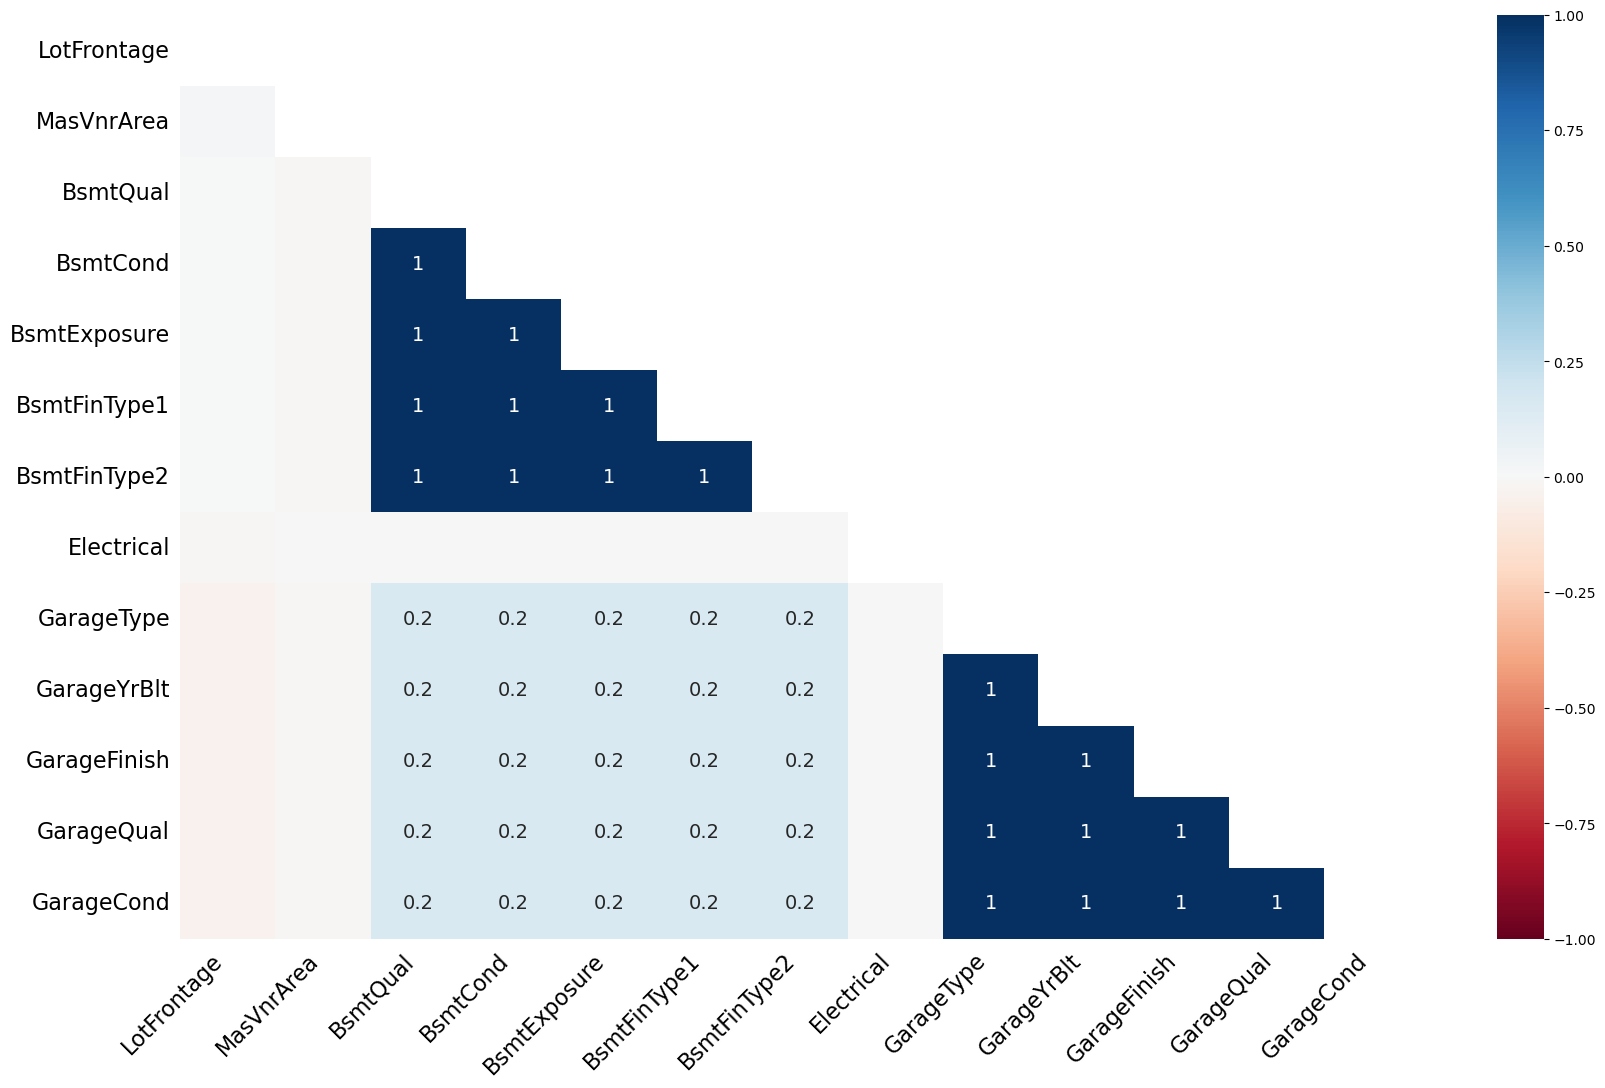

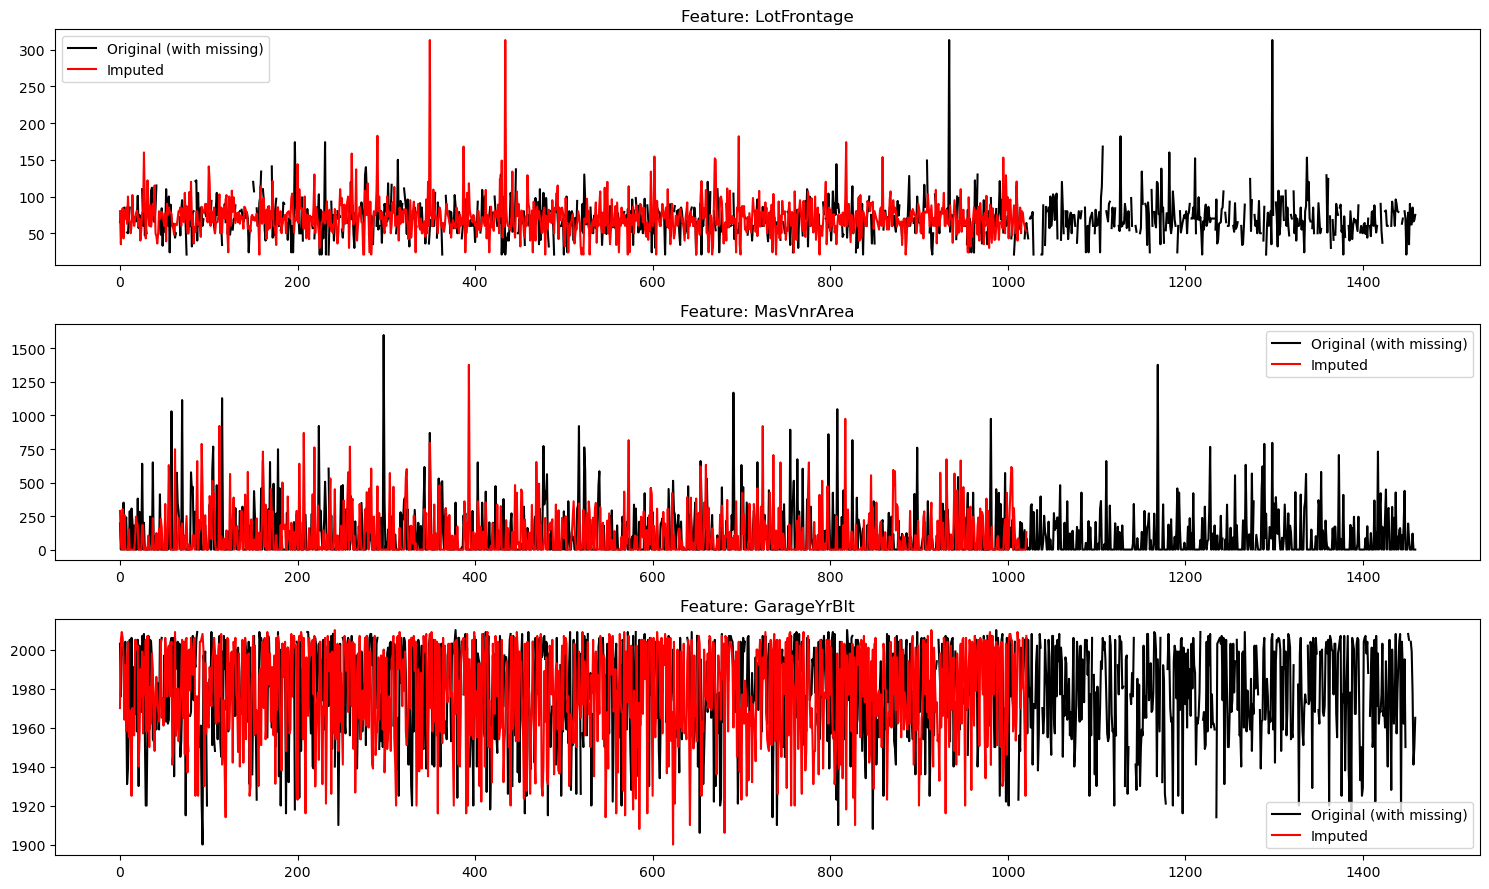

In [5]:
from sklearn.model_selection import train_test_split
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer       

# Split into train/val/cal
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_cal, y_val, y_cal = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Visualize missing values in training data
msno.heatmap(X_train)
plt.show()

# ----- Numeric Imputation -----
# Fit IterativeImputer on training data
numeric_imputer = IterativeImputer(random_state=42)
X_train[numeric_cols] = pd.DataFrame(numeric_imputer.fit_transform(X_train[numeric_cols]), columns=numeric_cols, index=X_train.index)

# Apply to val, cal, test
for df in [X_val, X_cal, test]:
    df[numeric_cols] = pd.DataFrame(numeric_imputer.transform(df[numeric_cols]), columns=numeric_cols, index=df.index)

# ----- Categorical Imputation -----
# Fill with most frequent value (mode) from training data
for col in categorical_cols: 
    mode = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(mode)
    for df in [X_val, X_cal, test]:
        df[col] = df[col].fillna(mode)

# Optional: Plot imputation effect
def plot_missing_imputation(original_df, imputed_df, cols):
    plt.figure(figsize=(15, len(cols)*3))
    for i, col in enumerate(cols):
        plt.subplot(len(cols), 1, i+1)
        plt.plot(original_df[col].values, color='black', label='Original (with missing)')
        plt.plot(imputed_df[col].values, color='red', label='Imputed')
        plt.title(f'Feature: {col}')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Check missing cols in original numeric data
cols_with_missing = X[numeric_cols].columns[X[numeric_cols].isnull().any()].tolist()
# Optional: plot (only for train if desired)
plot_missing_imputation(X[numeric_cols], X_train[numeric_cols], cols_with_missing)

In [6]:
def check_missing(df, name=""):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"Missing values in {name}:")
        print(missing)
    else:
        print(f"No missing values in {name}")

check_missing(X_train, "X_train")
check_missing(X_val, "X_val")
check_missing(X_cal, "X_cal")
check_missing(test, "test")

# Check if columns are entirely missing (all values are NaN)
print(X_train.isnull().all()[X_train.isnull().all()])

display(X_train.head())

No missing values in X_train
No missing values in X_val
No missing values in X_cal
No missing values in test
Series([], dtype: bool)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,20.0,RL,80.0,10400.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7.0,6.0,1970.0,1970.0,Hip,CompShg,Plywood,Plywood,288.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,1304.0,1304.0,GasA,Gd,Y,SBrkr,1682.0,0.0,0.0,1682.0,0.0,0.0,2.0,0.0,3.0,1.0,TA,7.0,Typ,1.0,Attchd,1970.0,Unf,2.0,530.0,TA,TA,Y,98.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2008.0,WD,Normal
1452,180.0,RM,35.0,3675.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5.0,5.0,2005.0,2005.0,Gable,CompShg,VinylSd,VinylSd,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072.0,0.0,0.0,1072.0,1.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,2006.0,WD,Normal
762,60.0,FV,72.0,8640.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7.0,5.0,2009.0,2009.0,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,24.0,Unf,0.0,732.0,756.0,GasA,Ex,Y,SBrkr,764.0,783.0,0.0,1547.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,0.0,Attchd,2009.0,Unf,2.0,614.0,TA,TA,Y,169.0,45.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,Con,Normal
932,20.0,RL,84.0,11670.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,9.0,5.0,2006.0,2006.0,Hip,CompShg,VinylSd,ImStucc,302.0,Ex,TA,PConc,Ex,Gd,No,Unf,0.0,Unf,0.0,1905.0,1905.0,GasA,Ex,Y,SBrkr,1905.0,0.0,0.0,1905.0,0.0,0.0,2.0,0.0,3.0,1.0,Ex,8.0,Typ,1.0,Attchd,2006.0,Fin,3.0,788.0,TA,TA,Y,0.0,191.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0,WD,Normal
435,60.0,RL,43.0,10667.0,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,PosN,Norm,1Fam,2Story,7.0,6.0,1996.0,1996.0,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,385.0,ALQ,344.0,70.0,799.0,GasA,Ex,Y,SBrkr,827.0,834.0,0.0,1661.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,1996.0,RFn,2.0,550.0,TA,TA,Y,158.0,61.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0,ConLw,Normal


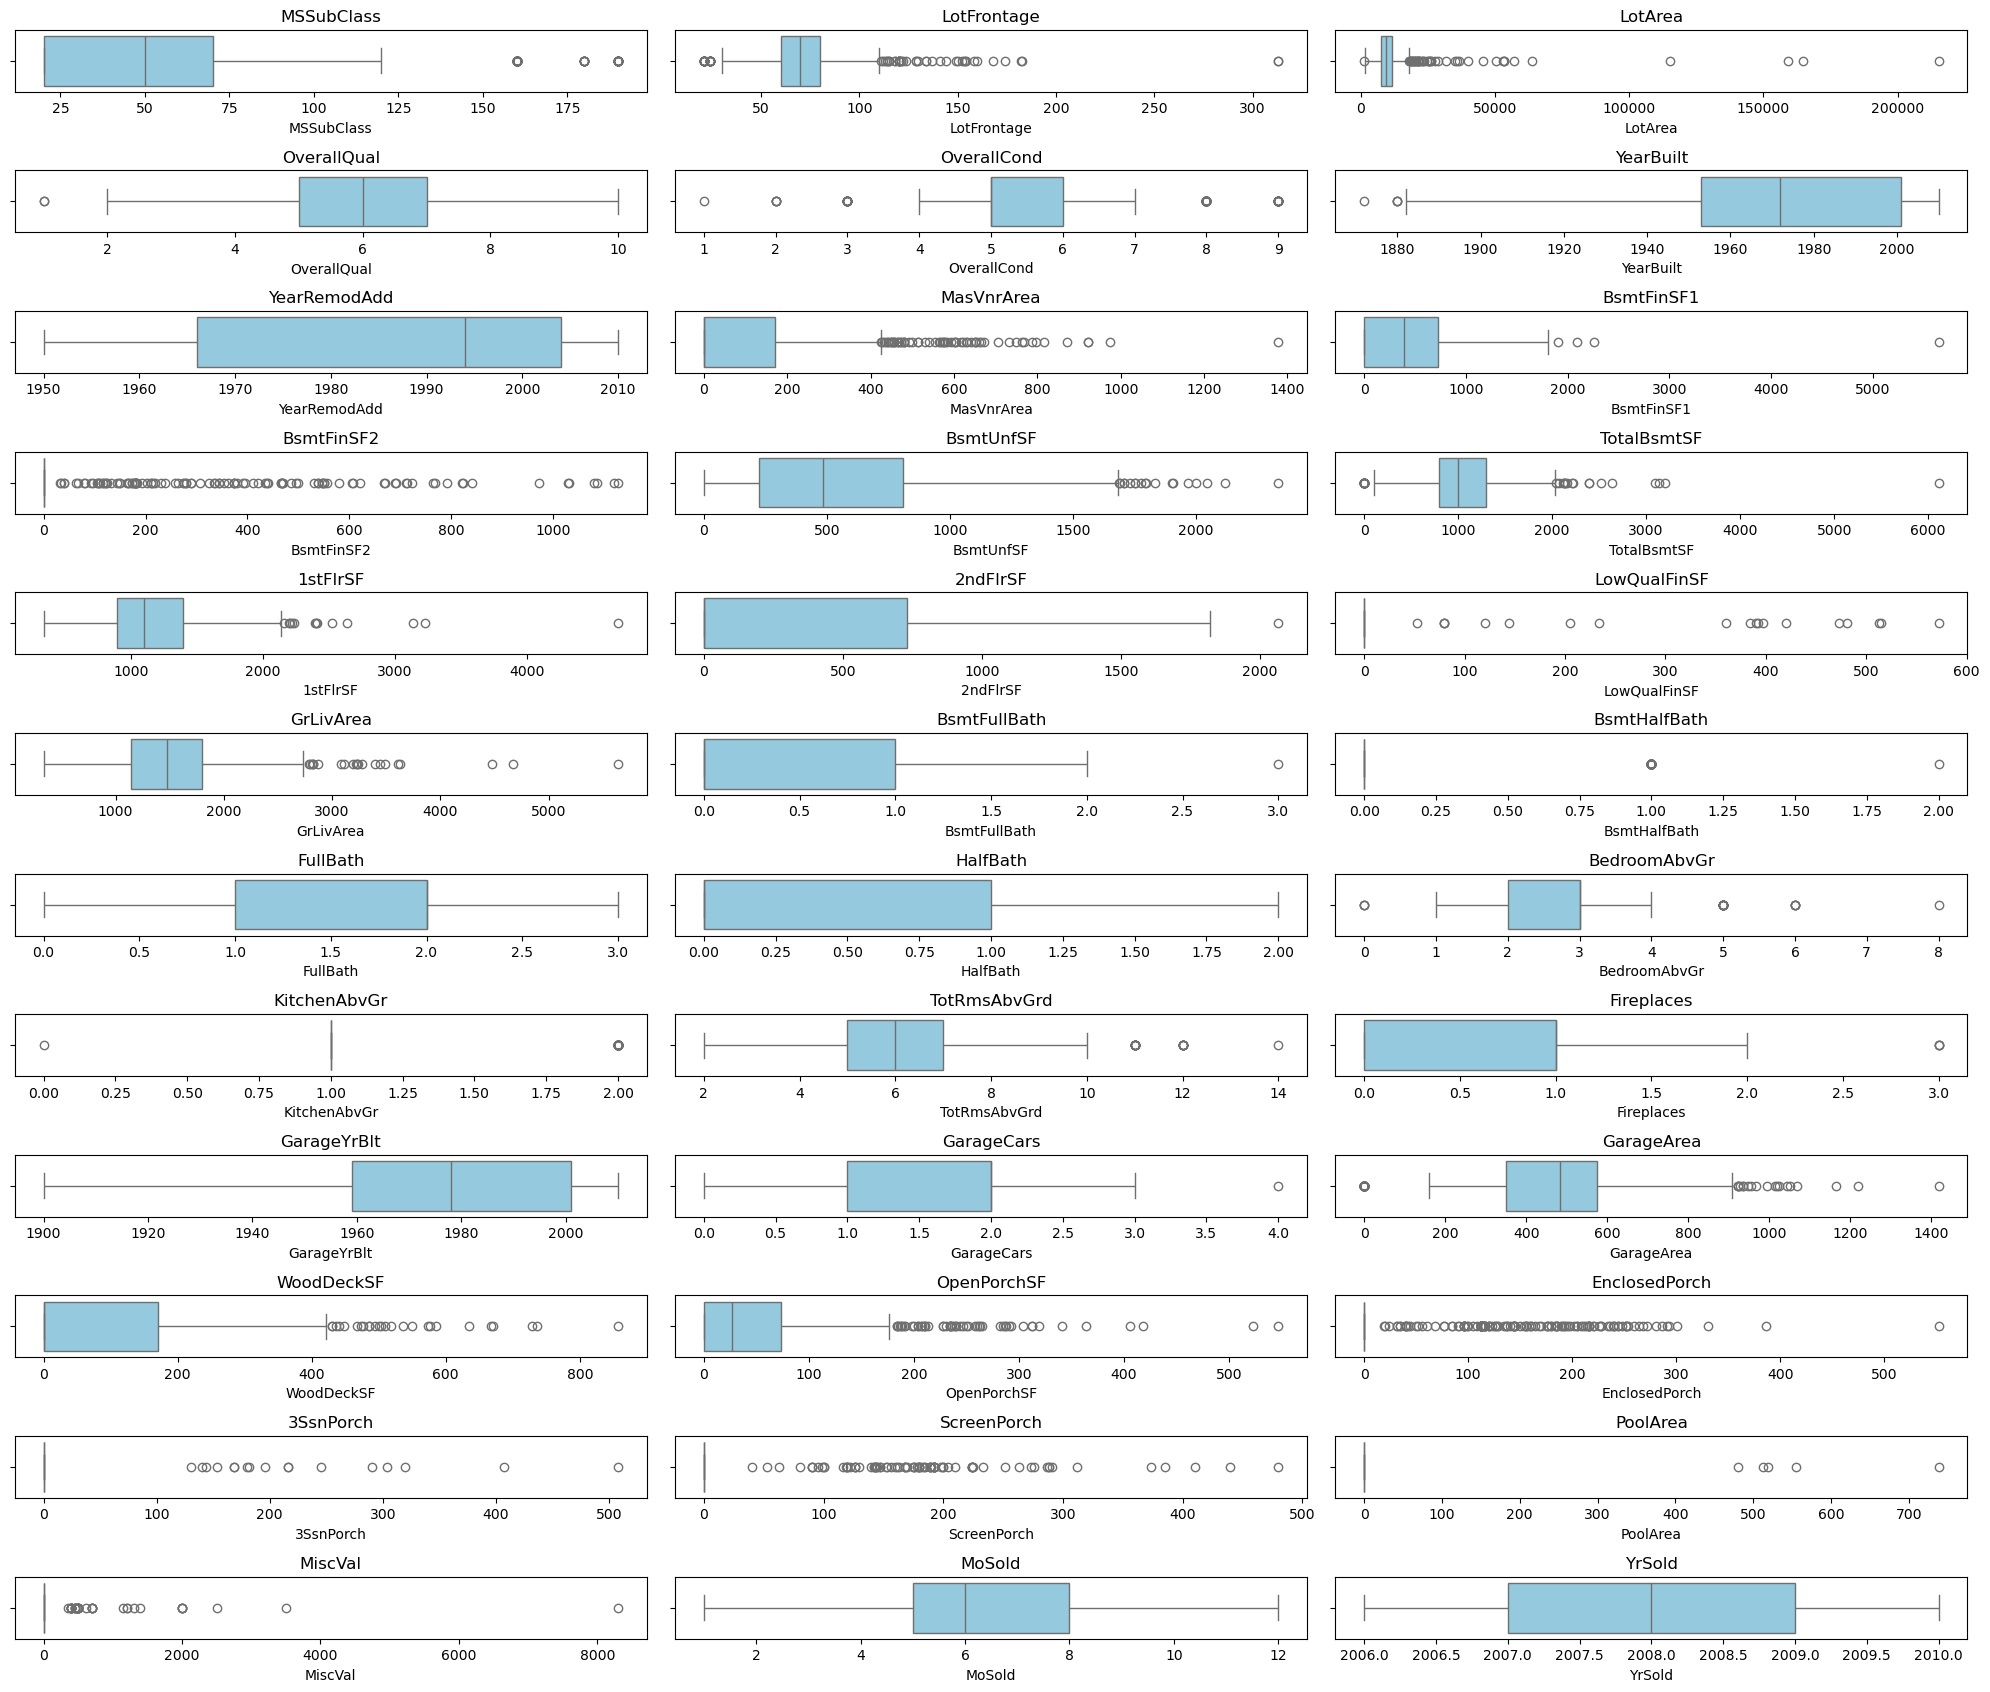

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*layout has changed to tight.*")

# Plot boxplots for each numerical column
def plot_boxplots(df, numeric_cols):
    plt.figure(figsize=(20, len(numeric_cols) * 0.5))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(col)
        plt.tight_layout()
    plt.show()

# Call it on training data
plot_boxplots(X_train, numeric_cols)

In [8]:
# Outlier removal (on training data only)
import numpy as np

def remove_outliers_iqr(df, columns, factor=1.5):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        # Keep only rows within bounds
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Remove outliers from training set only
X_train_cleaned = remove_outliers_iqr(X_train, numeric_cols)
# Align the target variable accordingly
y_train_cleaned = y_train.loc[X_train_cleaned.index]


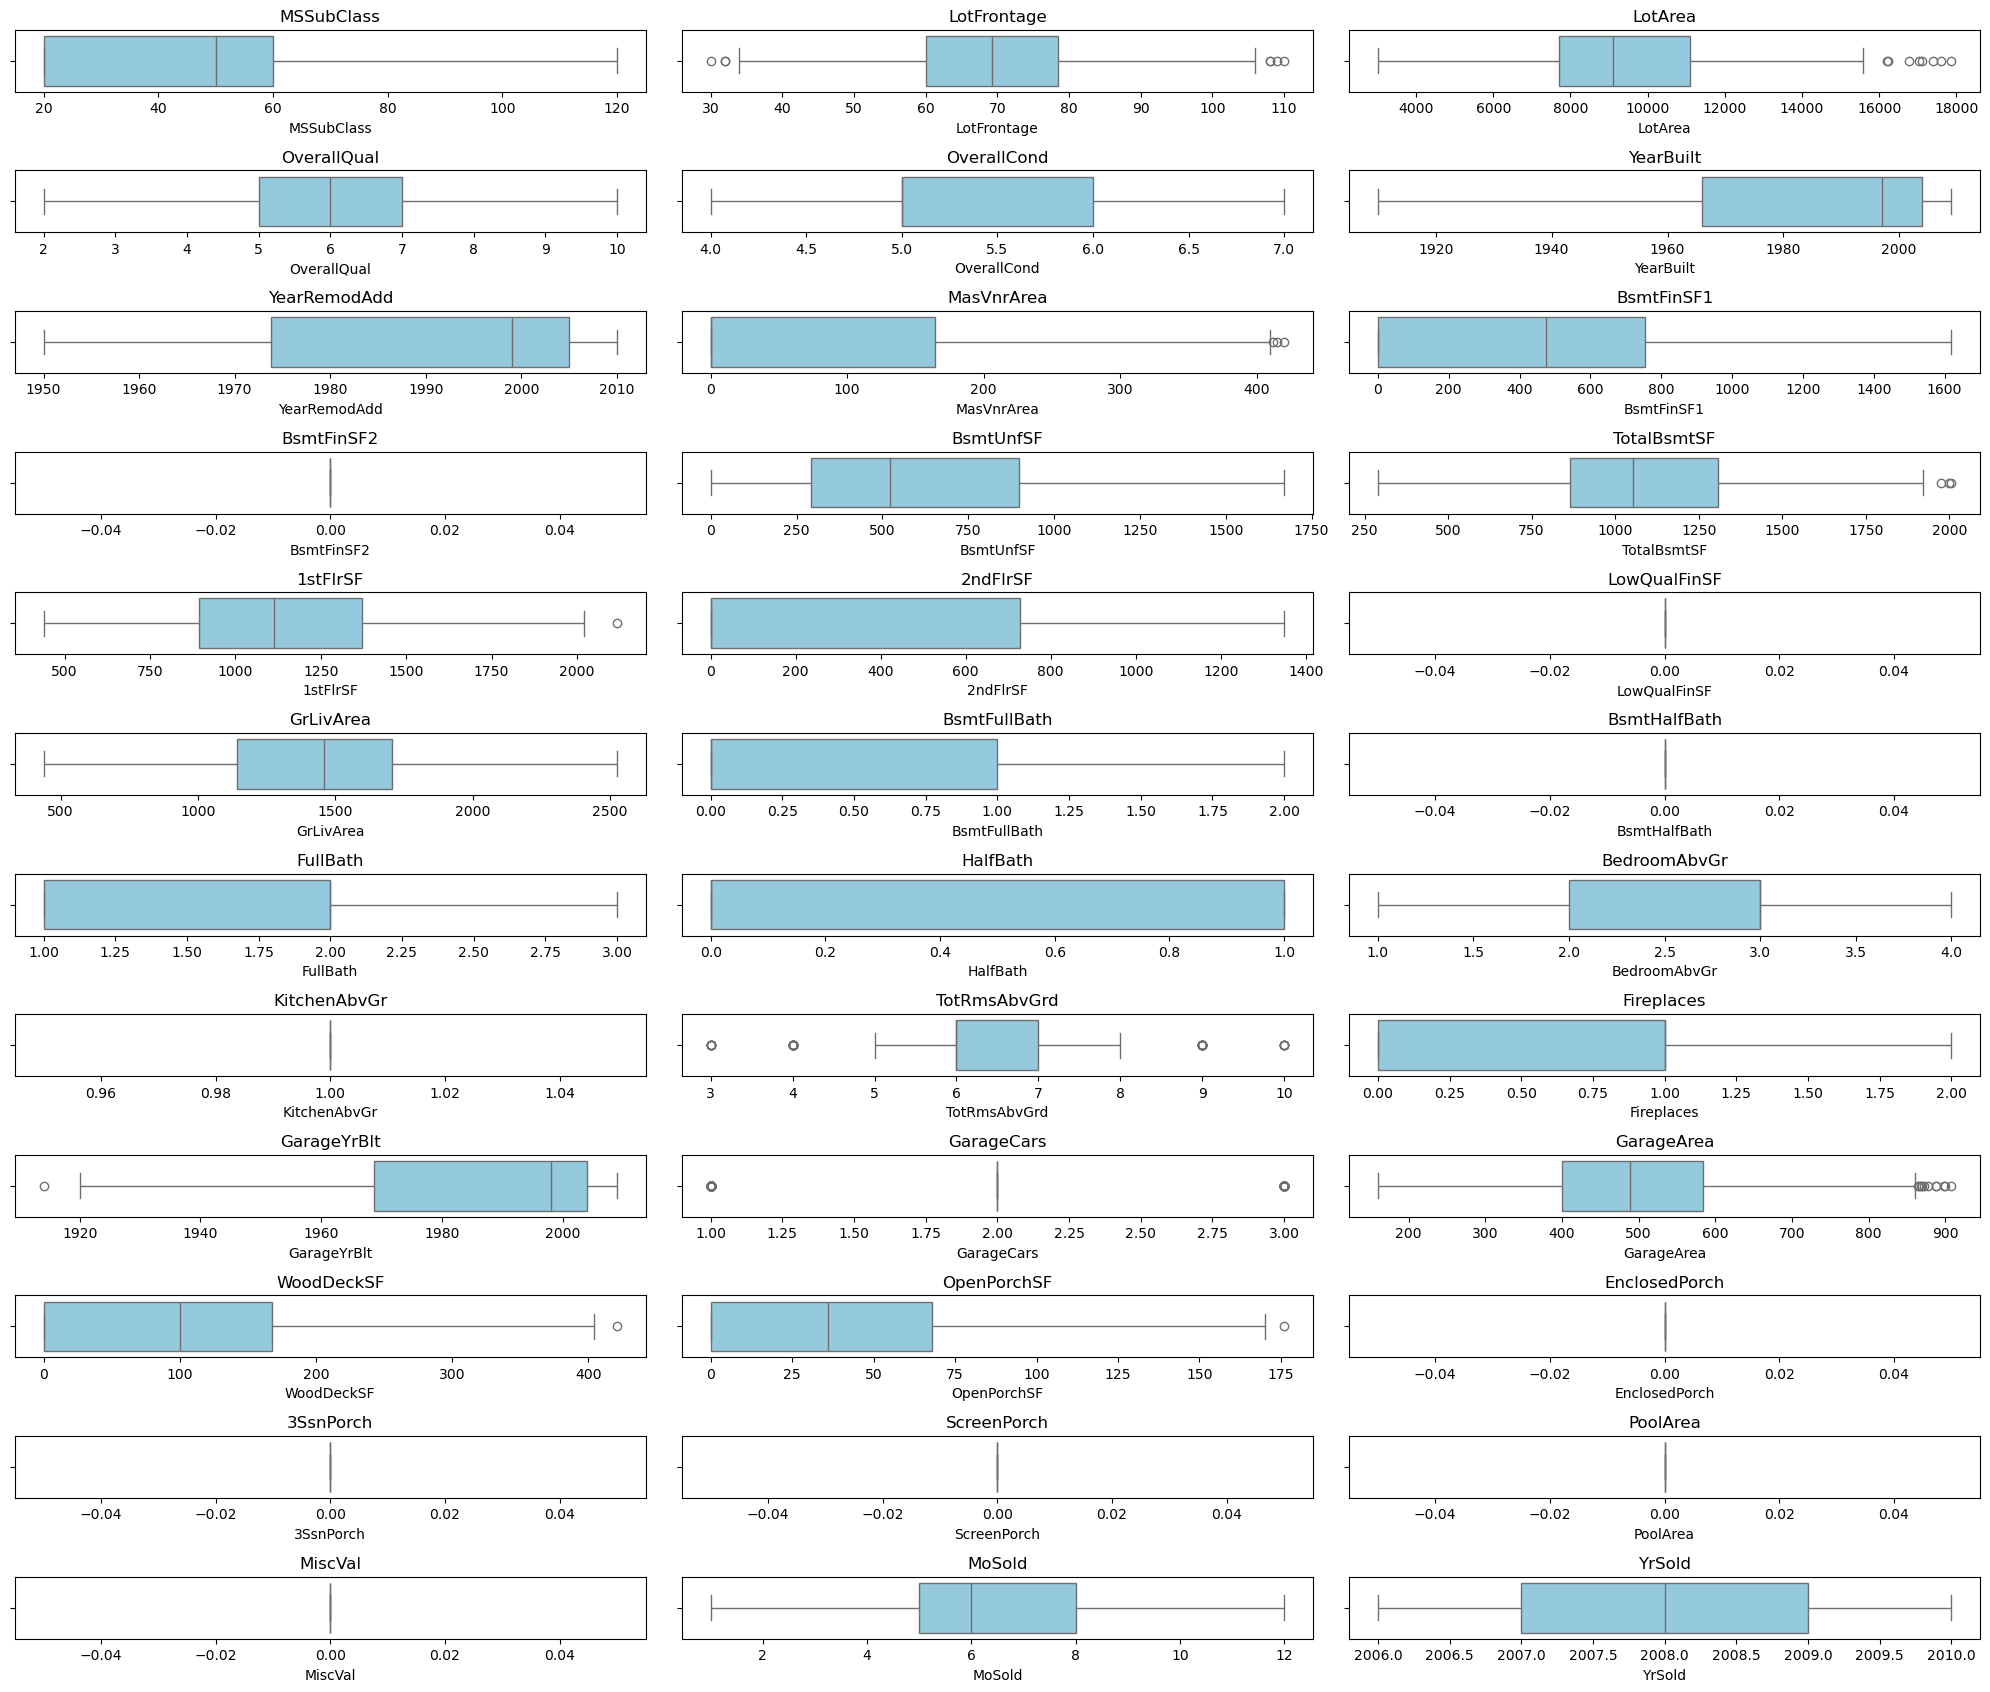

In [9]:
# Call it on training data
plot_boxplots(X_train_cleaned, numeric_cols)

In [10]:
# Feature Engineering

def engineer_features(df):
    df = df.copy()
    df["price_per_sqft"] = df.get("SalePrice", 0) / (df["GrLivArea"] + 1)
    df["age"] = df["YrSold"] - df["YearBuilt"]
    df["has_basement"] = (df["TotalBsmtSF"] > 0).astype(int)
    df["is_new"] = (df["YearBuilt"] == df["YrSold"]).astype(int)
    df["room_to_bath_ratio"] = df["TotRmsAbvGrd"] / (df["FullBath"] + df["HalfBath"] + 1)
    df["garage_score"] = df["GarageArea"] * df["GarageCars"]
    df["overall_score"] = df["OverallQual"] * df["OverallCond"]
    df["age_bin"] = pd.cut(df["age"], bins=[0, 10, 30, 200], labels=["new", "middle", "old"])
    return df

X_train = engineer_features(X_train)
X_val = engineer_features(X_val)
X_cal = engineer_features(X_cal)
test = engineer_features(test)

categorical_cols = list(categorical_cols)
numeric_cols = list(numeric_cols)

# Add new columns to column lists
categorical_cols += ["age_bin"]
numeric_cols += ["price_per_sqft", "age", "room_to_bath_ratio", "garage_score", "overall_score"]


# Target transformation
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Setup encoder
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Fit-transform on train, transform on others

X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_cal_encoded = encoder.transform(X_cal)
test_encoded = encoder.transform(test)

feature_names = encoder.get_feature_names_out()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=feature_names, index=X_val.index)
X_cal_encoded_df = pd.DataFrame(X_cal_encoded, columns=feature_names, index=X_cal.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=feature_names, index=test.index)

c:\Users\small\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Validation RMSE: 23583.24
Cross-validated RMSE: 0.15 ± 0.01


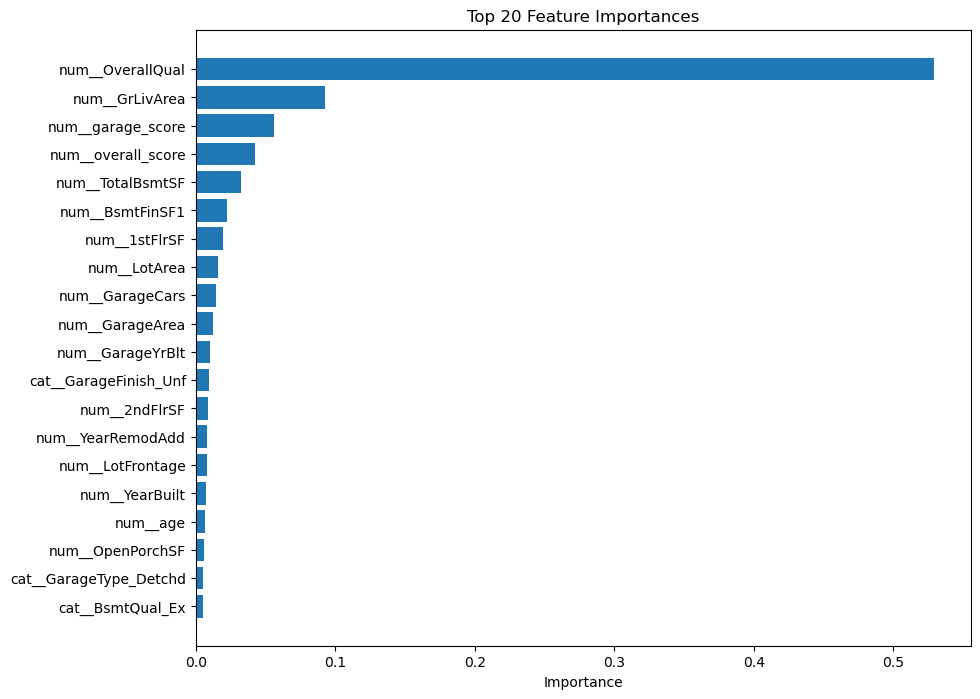

c:\Users\small\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\small\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\small\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\small\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Cross-validated RMSE (original scale): 31741.80 ± 6778.11


c:\Users\small\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_encoded_df, y_train_log)

# Predict
y_val_pred_log = model_rf.predict(X_val_encoded_df)
y_val_pred = np.expm1(y_val_pred_log)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"Validation RMSE: {rmse:.2f}")

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = -cross_val_score(
    model_rf, X_train_encoded_df, y_train_log,
    scoring='neg_root_mean_squared_error', cv=kf
)
print(f"Cross-validated RMSE: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")


# Feature importance
importances = model_rf.feature_importances_
feature_names = encoder.get_feature_names_out()

# Top 20
indices = np.argsort(importances)[-20:]
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.show()

# Scale
def rmse_exp(y_true, y_pred_log):
    y_true_exp = np.expm1(y_true)
    y_pred_exp = np.expm1(y_pred_log)
    return mean_squared_error(y_true_exp, y_pred_exp, squared=False)

rmse_scorer = make_scorer(rmse_exp, greater_is_better=False)

cv_rmse_exp = -cross_val_score(
    model_rf, X_train_encoded_df, y_train_log,
    scoring=rmse_scorer, cv=kf
)
print(f"Cross-validated RMSE (original scale): {cv_rmse_exp.mean():.2f} ± {cv_rmse_exp.std():.2f}")

In [ ]:
%pip install xgboost

Validation RMSE: 22524.48
Cross-validated RMSE: 0.13 ± 0.01


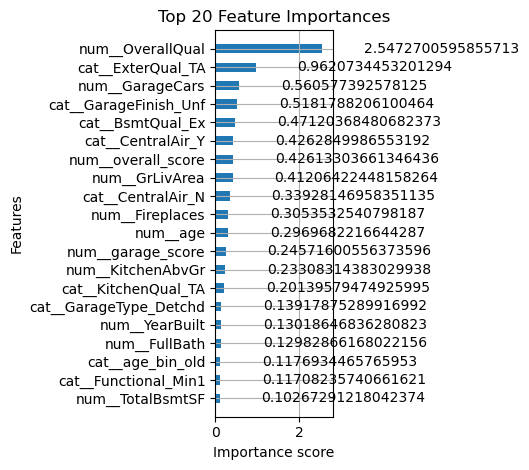

Cross-validated RMSE (original scale): 28004.49 ± 5865.09


In [17]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import make_scorer

# Model
model_xgb = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
model_xgb.fit(X_train_encoded_df, y_train_log)

# Validation
y_val_pred_log = model_xgb.predict(X_val_encoded_df)
y_val_pred = np.expm1(y_val_pred_log)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse:.2f}")

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = -cross_val_score(
    model_xgb, X_train_encoded_df, y_train_log,
    scoring='neg_root_mean_squared_error', cv=kf
)
print(f"Cross-validated RMSE: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")


# Feature importance
xgb.plot_importance(model_xgb, max_num_features=20, importance_type='gain', height=0.5)
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()


# Scale
def rmse_exp(y_true, y_pred_log):
    y_true_exp = np.expm1(y_true)
    y_pred_exp = np.expm1(y_pred_log)
    return np.sqrt(mean_squared_error(y_true_exp, y_pred_exp))

rmse_scorer = make_scorer(rmse_exp, greater_is_better=False)

cv_rmse_exp = -cross_val_score(
    model_xgb, X_train_encoded_df, y_train_log,
    scoring=rmse_scorer, cv=kf
)
print(f"Cross-validated RMSE (original scale): {cv_rmse_exp.mean():.2f} ± {cv_rmse_exp.std():.2f}")